In [119]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [83]:
val_data = pd.read_csv(
        "data/cloze_test_val__spring2016 - cloze_test_ALL_val.csv")
labels = []
pos_endings = []
neg_endings=[]
passages = []
passages_untok = []
for i in range(0, val_data.shape[0]):
    sent1 = nltk.word_tokenize(val_data.iloc[i, 1].lower())
    sent2 = nltk.word_tokenize(val_data.iloc[i, 2].lower())
    sent3 = nltk.word_tokenize(val_data.iloc[i, 3].lower())
    sent4 = nltk.word_tokenize(val_data.iloc[i, 4].lower())
    passages_untok.append(val_data.iloc[i, 1].lower() + " " +
                              val_data.iloc[i, 2].lower() + " " +
                              val_data.iloc[i, 3].lower() + " " +
                              val_data.iloc[i, 4].lower())
    #passages_untok.append(val_data.iloc[i, 1].lower() + " " +
    #                          val_data.iloc[i, 2].lower() + " " +
    #                          val_data.iloc[i, 3].lower() + " " +
    #                          val_data.iloc[i, 4].lower())
    doc = [sent1, sent2, sent3, sent4]
    doc_unlist = [item for sublist in doc for item in sublist]
    passages.append(doc_unlist)
    lab = val_data.iloc[i, 7]
    end1 = val_data.iloc[i, 5]
    end2 = val_data.iloc[i, 6]
    if lab == 1:
        labels.append(1)
        pos_endings.append(end1)
    else:
        labels.append(0)
        neg_endings.append(end1)
    if lab == 2:
        labels.append(1)
        pos_endings.append(end2)
    else:
        labels.append(0)
        neg_endings.append(end2)

In [38]:
def get_length(endings):
    return [len(nltk.word_tokenize(i)) for i in endings]

In [39]:
pos_length=get_length(pos_endings)

In [40]:
neg_length=get_length(neg_endings)

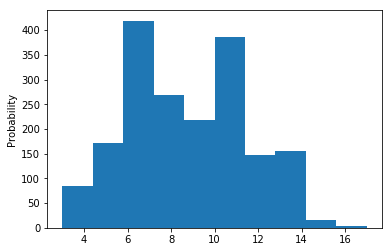

In [41]:
plt.hist(pos_length)
plt.ylabel('Probability');

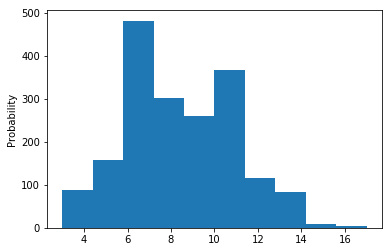

In [42]:
plt.hist(neg_length)
plt.ylabel('Probability');

In [43]:
np.mean(pos_length)

8.653126670229824

In [44]:
np.mean(neg_length)

8.336183858898984

In [45]:
np.std(pos_length)

2.7035893959912007

In [46]:
np.std(neg_length)

2.447911702063011

In [54]:
def get_pol_sub(endings):
    polarity = []
    subjectivity = []
    for x in endings:
        polarity.append(TextBlob(x).sentiment[0])
        subjectivity.append(TextBlob(x).sentiment[1])
    polarity = np.reshape(polarity, [len(endings), 1])
    subjectivity = np.reshape(subjectivity, [len(endings), 1])
    return polarity, subjectivity

In [55]:
pos_pol,pos_sub=get_pol_sub(pos_endings)

In [56]:
neg_pol,neg_sub=get_pol_sub(neg_endings)

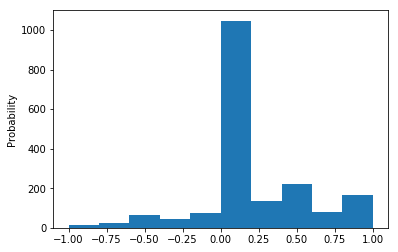

In [57]:
plt.hist(pos_pol)
plt.ylabel('Probability');

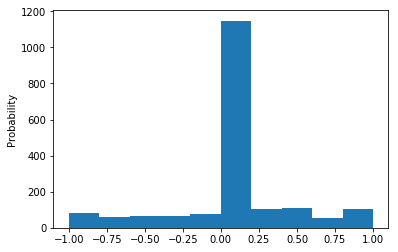

In [58]:
plt.hist(neg_pol)
plt.ylabel('Probability');

In [61]:
np.mean(pos_pol)

0.15573095266374262

In [62]:
np.mean(neg_pol)

0.02995117987996128

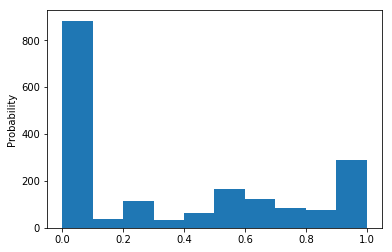

In [59]:
plt.hist(pos_sub)
plt.ylabel('Probability');

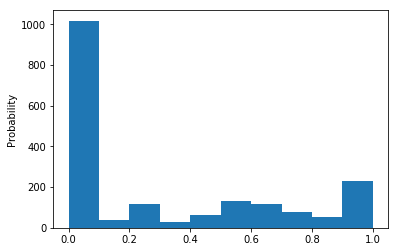

In [60]:
plt.hist(neg_sub)
plt.ylabel('Probability');

In [66]:
np.mean(pos_sub)

0.34901036909722105

In [65]:
np.mean(neg_sub)

0.29212393636017364

In [67]:
def get_1gram_intersection_count_duplicates(endings, passages):
    intersection_count = []
    for i in range(np.shape(passages)[0]):
        ending_tokenized = nltk.word_tokenize(endings[i].lower())
        count = 0
        for x in ending_tokenized:
            if x in passages[i]:
                count = count + 1
        #print(count)
        intersection_count.append(count)
    return np.reshape(np.array(intersection_count), [len(endings), 1])

In [68]:
one_gram_pos=get_1gram_intersection_count_duplicates(pos_endings,passages)

In [69]:
one_gram_neg=get_1gram_intersection_count_duplicates(neg_endings,passages)

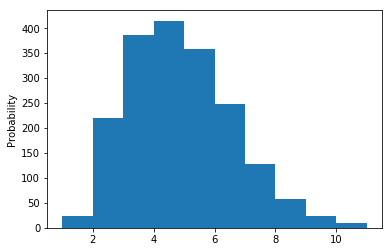

In [70]:
plt.hist(one_gram_pos)
plt.ylabel('Probability');

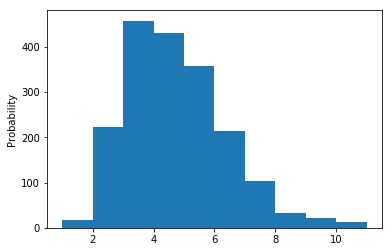

In [71]:
plt.hist(one_gram_neg)
plt.ylabel('Probability');

In [72]:
np.mean(one_gram_pos)

4.400320684126136

In [73]:
np.mean(one_gram_neg)

4.244254409406734

In [74]:
#add cosine similarity measure (sent2vec) between passage and endings

In [76]:
def document_features(endings):
    token = RegexpTokenizer(r'[a-zA-Z0-9]+')
    cv = CountVectorizer(lowercase=True,
                         stop_words='english',
                         ngram_range=(1, 1),
                         tokenizer=token.tokenize)
    text_counts = cv.fit_transform(endings)
    #print(np.shape(text_counts))
    return text_counts.todense()

In [84]:
endings=[]
for k in passages_untok:
    endings.append(k)
for i in pos_endings:
    endings.append(i)
for j in neg_endings:
    endings.append(j)

In [85]:
text_count_vectors=document_features(endings)

In [86]:
np.shape(text_count_vectors)

(5613, 6904)

In [87]:
passages_vectors=text_count_vectors[0:len(passages_untok),:]

In [88]:
pos_ending_vectors=text_count_vectors[len(passages_untok):len(passages_untok)+len(pos_endings),:]

In [89]:
neg_ending_vectors=text_count_vectors[len(passages_untok)+len(pos_endings):len(passages_untok)+len(pos_endings)+len(neg_endings),:]

In [104]:
def return_sims(a,b):
    sim=[]
    for i in range(np.shape(a)[0]):
        sim.append(cosine_similarity(a[i,:],b[i,:])[0,0])
    return sim

In [105]:
pos_sim=return_sims(passages_vectors,pos_ending_vectors)

In [107]:
neg_sim=return_sims(passages_vectors,neg_ending_vectors)

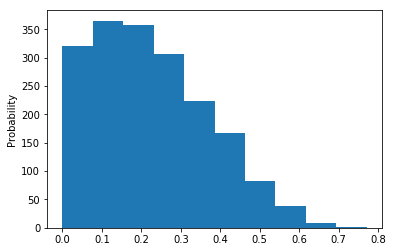

In [108]:
plt.hist(pos_sim)
plt.ylabel('Probability');

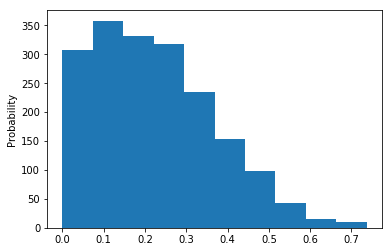

In [109]:
plt.hist(neg_sim)
plt.ylabel('Probability');

In [110]:
np.mean(pos_sim)

0.2211029354570949

In [111]:
np.mean(neg_sim)

0.2198195772554654

In [121]:
sid=SentimentIntensityAnalyzer()

In [129]:
def vader(endings):
 neg=[]
 neu=[]
 pos=[]
 compound=[]
 for x in endings: 
    ss = sid.polarity_scores(x)
    neg.append(ss['neg'])
    neu.append(ss['neu'])
    pos.append(ss['pos'])
    compound.append(ss['compound'])
 return neg,neu,pos,compound

In [130]:
pos_neg,pos_neu,pos_pos,pos_compound=vader(pos_endings)

In [131]:
neg_neg,neg_neu,neg_pos,neg_compound=vader(neg_endings)

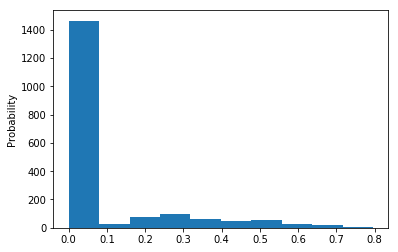

In [132]:
plt.hist(pos_neg)
plt.ylabel('Probability');

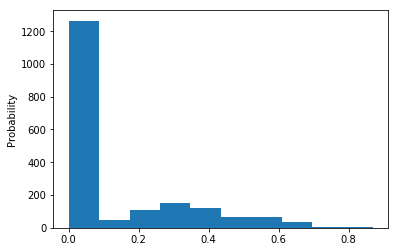

In [133]:
plt.hist(neg_neg)
plt.ylabel('Probability');

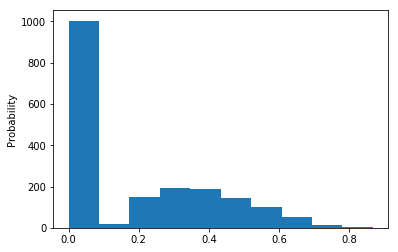

In [134]:
plt.hist(pos_pos)
plt.ylabel('Probability');

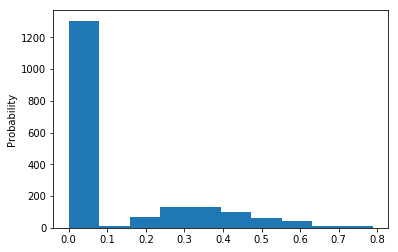

In [135]:
plt.hist(neg_pos)
plt.ylabel('Probability');

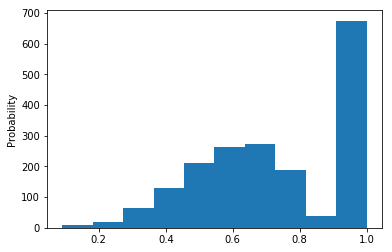

In [137]:
plt.hist(pos_neu)
plt.ylabel('Probability');

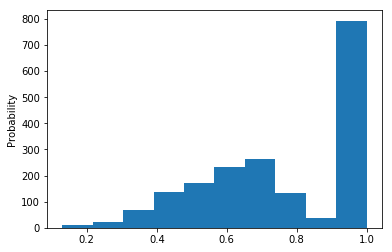

In [138]:
plt.hist(neg_neu)
plt.ylabel('Probability');

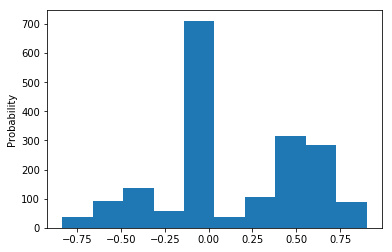

In [139]:
plt.hist(pos_compound)
plt.ylabel('Probability');

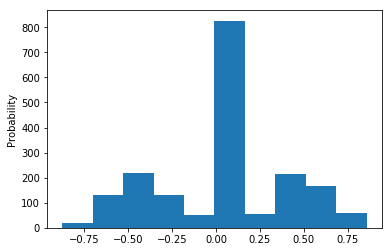

In [140]:
plt.hist(neg_compound)
plt.ylabel('Probability');